In [3]:
conda install -c anaconda py-xgboost

Solving environment: ...working... 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2019.03=py37_0
done

## Package Plan ##

  environment location: C:\Users\lilyx\Anaconda3

  added / updated specs:
    - py-xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0           9 KB  anaconda
    ca-certificates-2019.1.23  |                0         158 KB  anaconda
    certifi-2019.3.9           |           py37_0         155 KB  anaconda
    conda-4.6.14               |           py37_0         2.1 MB  anaconda
    libxgboost-0.80            |                0         3.6 MB  anaconda
    openssl-1.1.1              |       he774522_0         5.7 MB  anaconda
    py-xgboost-0.80            |           py37_0          67 KB  anaconda
 

In [696]:
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
# import category_encoders as ce
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.exceptions import DataConversionWarning
from sklearn.preprocessing import StandardScaler
# from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import xgboost
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

from ipywidgets import interact
import seaborn as sns

In [967]:
df = pd.read_csv('Corn_Supply_&_Demand_30.csv', nrows=91)

In [968]:
df.isna().sum().sort_values(ascending=False)

Unnamed: 0                          91
Unnamed: 35                         91
Unnamed: 69                         91
Unnamed: 70                         91
Unnamed: 71                         91
 Corn Used for Ethanol              73
 Corn Used for Ethanol .1           73
Ethanol Usage % of Prod.            73
 Corn Used for Ethanol .2           73
Trend Yield                         67
Trend Yield.1                       67
Trend Yield.2                       67
Target Price                        66
Loan Rate                           66
Cash/Loan Rate (%).1                66
Loan Rate.1                         66
Target Price.1                      66
Target Price.2                      66
Loan Rate.2                         66
Cash/Loan Rate (%).2                66
Cash/Loan Rate (%)                  66
 Reserve .2                         64
 Reserve                            64
 Reserve .1                         64
 CCC .2                             57
 CCC .1                  

In [969]:
df = df.fillna(0)#done later
pd.set_option("display.max_rows", 999, "display.max_columns", 999)
df.shape

(91, 105)

In [970]:
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 69', 'Unnamed: 70', 'Unnamed: 71', 'Unnamed: 35'])

In [971]:
df.loc[60:65]

Year  Year.1  Year.2  Planted Acres   Harvested Acres   Actual Yield  \
60  1989      89      89         72,322            64,783          116.3   
61  1990      90      90         74,166            66,952          118.5   
62  1991      91      91         75,957            68,822          108.6   
63  1992      92      92         79,311            72,077          131.5   
64  1993      93      93         73,235            62,921          100.7   
65  1994      94      94         79,175            72,887          138.6   

    Production    Stocks   Imports  Total Supply   Seed  \
60       7,532     1,930       2.0         9,464   19.0   
61       7,934     1,344       3.0         9,281   19.0   
62       7,475     1,521      20.0         9,016   20.0   
63       9,477     1,100       7.0        10,584   19.0   
64       6,336     2,113      21.0         8,470   21.0   
65      10,103       850      10.0        10,962   20.0   

    Food, Alcohol & Industrial   Corn Used for Ethanol   \
60                       1,337                        0   
61                       1,354                        0   
62                       1,434                        0   
63                       1,492                        0   
64                       1,567                        0   
65                       1,684                        0   

    Feed & Residual Usage   All Dom. Use   Exports   Total Usage   \
60                  4,389          5,745     2,368         8,113    
61                  4,663          6,036     1,725         7,761    
62                  4,878          6,332     1,584         7,916    
63                  5,301          6,812     1,663         8,475    
64                  4,704          6,292     1,328         7,620    
65                  5,523          7,227     2,177         9,404    

    Ending Stocks      Free   Reserve     CCC    Loan  Stock/Use (%)  \
60          1,351       619       387     233    112           0.167   
61          1,520       937         3     371    209           0.196   
62          1,100       791       -       113    196           0.139   
63          2,109     1,347        13      56    693           0.249   
64            850       609       119      45     77           0.112   
65          1,558     1,090        78      42    348           0.166   

   Corn Avg Farm Price SB Avg Farm Price  SB/Corn P Ratio Target Price  \
60              $2.36             $5.69              2.41       $2.84    
61              $2.28             $5.74              2.52       $2.75    
62              $2.37             $5.58              2.35       $2.75    
63              $2.07             $5.56              2.69       $2.75    
64              $2.50             $6.40              2.56       $2.75    
65              $2.26             $5.48              2.42       $2.75    

   Loan Rate Cash/Loan Rate (%)  Trend Yield  GDP99 Def  \
60    $1.65                143%          0.0       80.1   
61    $1.57                145%          0.0       83.2   
62    $1.62                146%          0.0       86.0   
63    $1.72                120%          0.0       87.9   
64    $1.72                145%          0.0       90.2   
65    $1.89                120%          0.0       92.1   

   Ind & Alcohol Usage % of Prod. Feed Usage % of Prod  \
60                            18%                  58%   
61                            17%                  59%   
62                            19%                  65%   
63                            16%                  56%   
64                            25%                  74%   
65                            17%                  55%   

   Ethanol Usage % of Prod.  Year.3  Year.4  Year.5  Planted Acres .1  \
60                        0    1989      89      89           72,322    
61                        0    1990      90      90           74,166    
62                        0    1991      91      91           75,957    
63                    

In [972]:
minmax = df[df['Year'] > .01]#select dataframe where column 'Year' is nonzero
minmax = minmax.describe()
minmax.loc[['min','max']]

Year  Year.1  Year.2  Actual Yield  Imports  Seed  Stock/Use (%)  \
min  1929.0    29.0     0.0          15.7      0.0   0.0          0.000   
max  2019.0   119.0    99.0         176.6    160.0  22.0          0.661   

     SB/Corn P Ratio  Trend Yield  GDP99 Def  Year.3  Year.4  Year.5  \
min             0.00          0.0        0.0  1929.0    29.0     0.0   
max             3.19        182.7      100.0  2019.0   119.0    99.0   

     Actual Yield.1  Imports.1  Seed.1  Stock/Use (%).1  SB/Corn P Ratio.1  \
min            15.7        0.0     0.0            0.000               0.00   
max           176.6      160.0    22.0            0.661               3.19   

     Trend Yield.1  GDP99 Def.1  Year.6  Year.7  Year.8  Actual Yield.2  \
min            0.0          0.0  1929.0    29.0     0.0            15.7   
max          182.7        100.0  2019.0   119.0    99.0           176.6   

     Imports.2  Seed.2  Stock/Use (%).2  SB/Corn P Ratio.2  Trend Yield.2  \
min        0.0     0.0            0.000               0.00            0.0   
max      160.0    22.0            0.661               3.19          182.7   

     GDP99 Def.2  
min          0.0  
max        100.0

In [973]:
df.loc[df['Year']==1929]

Year  Year.1  Year.2  Planted Acres   Harvested Acres   Actual Yield  \
0  1929      29      29         99,130            97,805           25.7   

   Production   Stocks   Imports  Total Supply   Seed  \
0            0        0      0.0              0   0.0   

   Food, Alcohol & Industrial   Corn Used for Ethanol   \
0                            0                       0   

   Feed & Residual Usage   All Dom. Use   Exports   Total Usage   \
0                       0              0         0             0   

   Ending Stocks   Free   Reserve   CCC  Loan  Stock/Use (%)  \
0               0      0         0     0    0            0.0   

  Corn Avg Farm Price SB Avg Farm Price  SB/Corn P Ratio Target Price  \
0              $0.80                  0              0.0            0   

  Loan Rate Cash/Loan Rate (%)  Trend Yield  GDP99 Def  \
0         0                  0          0.0        0.0   

  Ind & Alcohol Usage % of Prod. Feed Usage % of Prod  \
0                              0                    0   

  Ethanol Usage % of Prod.  Year.3  Year.4  Year.5  Planted Acres .1  \
0                        0    1929      29      29           99,130    

   Harvested Acres .1  Actual Yield.1  Production .1  Stocks .1  Imports.1  \
0             97,805             25.7              0          0        0.0   

   Total Supply .1  Seed.1  Food, Alcohol & Industrial .1  \
0                0     0.0                              0   

   Corn Used for Ethanol .1  Feed & Residual Usage .1  All Dom. Use .1  \
0                         0                         0                0   

   Exports .1  Total Usage .1  Ending Stocks .1  Free .1  Reserve .1  CCC .1  \
0           0               0                 0        0           0       0   

  Loan.1  Stock/Use (%).1 Corn Avg Farm Price.1 SB Avg Farm Price.1  \
0      0              0.0                $0.80                    0   

   SB/Corn P Ratio.1 Target Price.1 Loan Rate.1 Cash/Loan Rate (%).1  \
0                0.0              0           0                    0   

   Trend Yield.1  GDP99 Def.1 Ind & Alcohol Usage % of Prod..1  \
0            0.0          0.0                                0   

  Feed Usage % of Prod.1  Year.6  Year.7  Year.8  Planted Acres .2  \
0                      0    1929      29      29           99,130    

   Harvested Acres .2  Actual Yield.2  Production .2  Stocks .2  Imports.2  \
0             97,805             25.7              0          0        0.0   

   Total Supply .2  Seed.2  Food, Alcohol & Industrial .2  \
0                0     0.0                              0   

   Corn Used for Ethanol .2  Feed & Residual Usage .2  All Dom. Use .2  \
0                         0                         0                0   

   Exports .2  Total Usage .2  Ending Stocks .2  Free .2  Reserve .2  CCC .2  \
0           0               0                 0        0           0       0   

  Loan.2  Stock/Use (%).2 Corn Avg Farm Price.2 SB Avg Farm Price.2  \
0      0              0.0                $0.80                    0   

   SB/Corn P Ratio.2 Target Price.2 Loan Rate.2 Cash/Loan Rate (%).2  \
0                0.0              0           0                    0   

   Trend Yield.2  GDP99 Def.2 Ind & Alcohol Usage % of Prod..2  \
0            0.0          0.0                                0   

  Feed Usage % of Prod.2  
0                      0

In [974]:
df.columns.tolist()

['Year',
 'Year.1',
 'Year.2',
 ' Planted Acres ',
 ' Harvested Acres ',
 'Actual Yield',
 ' Production ',
 ' Stocks ',
 'Imports',
 ' Total Supply ',
 'Seed',
 ' Food, Alcohol & Industrial ',
 ' Corn Used for Ethanol ',
 ' Feed & Residual Usage ',
 ' All Dom. Use ',
 ' Exports ',
 ' Total Usage ',
 ' Ending Stocks ',
 ' Free ',
 ' Reserve ',
 ' CCC ',
 'Loan',
 'Stock/Use (%)',
 'Corn Avg Farm Price',
 'SB Avg Farm Price',
 'SB/Corn P Ratio',
 'Target Price',
 'Loan Rate',
 'Cash/Loan Rate (%)',
 'Trend Yield',
 'GDP99 Def',
 'Ind & Alcohol Usage % of Prod.',
 'Feed Usage % of Prod',
 'Ethanol Usage % of Prod.',
 'Year.3',
 'Year.4',
 'Year.5',
 ' Planted Acres .1',
 ' Harvested Acres .1',
 'Actual Yield.1',
 ' Production .1',
 ' Stocks .1',
 'Imports.1',
 ' Total Supply .1',
 'Seed.1',
 ' Food, Alcohol & Industrial .1',
 ' Corn Used for Ethanol .1',
 ' Feed & Residual Usage .1',
 ' All Dom. Use .1',
 ' Exports .1',
 ' Total Usage .1',
 ' Ending Stocks .1',
 ' Free .1',
 ' Reserve .1'

In [975]:
df.columns = df.columns.str.replace(' ', '')
df.columns.tolist()

['Year',
 'Year.1',
 'Year.2',
 'PlantedAcres',
 'HarvestedAcres',
 'ActualYield',
 'Production',
 'Stocks',
 'Imports',
 'TotalSupply',
 'Seed',
 'Food,Alcohol&Industrial',
 'CornUsedforEthanol',
 'Feed&ResidualUsage',
 'AllDom.Use',
 'Exports',
 'TotalUsage',
 'EndingStocks',
 'Free',
 'Reserve',
 'CCC',
 'Loan',
 'Stock/Use(%)',
 'CornAvgFarmPrice',
 'SBAvgFarmPrice',
 'SB/CornPRatio',
 'TargetPrice',
 'LoanRate',
 'Cash/LoanRate(%)',
 'TrendYield',
 'GDP99Def',
 'Ind&AlcoholUsage%ofProd.',
 'FeedUsage%ofProd',
 'EthanolUsage%ofProd.',
 'Year.3',
 'Year.4',
 'Year.5',
 'PlantedAcres.1',
 'HarvestedAcres.1',
 'ActualYield.1',
 'Production.1',
 'Stocks.1',
 'Imports.1',
 'TotalSupply.1',
 'Seed.1',
 'Food,Alcohol&Industrial.1',
 'CornUsedforEthanol.1',
 'Feed&ResidualUsage.1',
 'AllDom.Use.1',
 'Exports.1',
 'TotalUsage.1',
 'EndingStocks.1',
 'Free.1',
 'Reserve.1',
 'CCC.1',
 'Loan.1',
 'Stock/Use(%).1',
 'CornAvgFarmPrice.1',
 'SBAvgFarmPrice.1',
 'SB/CornPRatio.1',
 'TargetPrice.1

In [976]:
df.loc[df['Year']==1986, ['Free']]

Free
57    (160)

In [977]:
df.loc[df['Year']==1985, ['Free']]

Free
56    193

In [978]:
df.select_dtypes(exclude='number').columns.tolist()

['PlantedAcres',
 'HarvestedAcres',
 'Production',
 'Stocks',
 'TotalSupply',
 'Food,Alcohol&Industrial',
 'CornUsedforEthanol',
 'Feed&ResidualUsage',
 'AllDom.Use',
 'Exports',
 'TotalUsage',
 'EndingStocks',
 'Free',
 'Reserve',
 'CCC',
 'Loan',
 'CornAvgFarmPrice',
 'SBAvgFarmPrice',
 'TargetPrice',
 'LoanRate',
 'Cash/LoanRate(%)',
 'Ind&AlcoholUsage%ofProd.',
 'FeedUsage%ofProd',
 'EthanolUsage%ofProd.',
 'PlantedAcres.1',
 'HarvestedAcres.1',
 'Production.1',
 'Stocks.1',
 'TotalSupply.1',
 'Food,Alcohol&Industrial.1',
 'CornUsedforEthanol.1',
 'Feed&ResidualUsage.1',
 'AllDom.Use.1',
 'Exports.1',
 'TotalUsage.1',
 'EndingStocks.1',
 'Free.1',
 'Reserve.1',
 'CCC.1',
 'Loan.1',
 'CornAvgFarmPrice.1',
 'SBAvgFarmPrice.1',
 'TargetPrice.1',
 'LoanRate.1',
 'Cash/LoanRate(%).1',
 'Ind&AlcoholUsage%ofProd..1',
 'FeedUsage%ofProd.1',
 'PlantedAcres.2',
 'HarvestedAcres.2',
 'Production.2',
 'Stocks.2',
 'TotalSupply.2',
 'Food,Alcohol&Industrial.2',
 'CornUsedforEthanol.2',
 'Feed&R

In [979]:
df.iloc[66]['Reserve.2']

'  -   '

In [982]:
def trim_all_columns(df):
    trim_dollar = lambda x: x.strip('$') if type(x) is str else x
    return df.applymap(trim_dollar)

def trim_all_columns2(df):
    trim_percent = lambda x: x.strip('%') if type(x) is str else x
    return df.applymap(trim_percent)

def trim_all_columns3(df):
    trim_par1 = lambda x: x.strip('(') if type(x) is str else x
    return df.applymap(trim_par1)

def trim_all_columns4(df):
    trim_par2 = lambda x: x.strip(')') if type(x) is str else x
    return df.applymap(trim_par2)

def trim_all_columns5(df):
    trim_dash = lambda x: x.replace('-', '0') if type(x) is str else x
    return df.applymap(trim_dash)

def trim_all_columns6(df):
    trim_strings = lambda x: x.strip() if type(x) is str else x
    return df.applymap(trim_strings)

def trim_all_columns7(df):
    trim_comma = lambda x: x.replace(',', '') if type(x) is str else x
    return df.applymap(trim_comma)



# simple example of trimming whitespace from data elements
df = trim_all_columns(df)
df = trim_all_columns2(df)
df = trim_all_columns3(df)
df = trim_all_columns4(df)
df = trim_all_columns5(df)
df = trim_all_columns6(df)
df = trim_all_columns7(df)
df.head(2)

Year  Year.1  Year.2 PlantedAcres HarvestedAcres  ActualYield Production  \
0  1929      29      29        99130          97805         25.7          0   
1  1930      30      30       103915         101465         20.5          0   

  Stocks  Imports TotalSupply  Seed Food,Alcohol&Industrial  \
0      0      0.0           0   0.0                       0   
1      0      0.0           0   0.0                       0   

  CornUsedforEthanol Feed&ResidualUsage AllDom.Use Exports TotalUsage  \
0                  0                  0          0       0          0   
1                  0                  0          0       0          0   

  EndingStocks Free Reserve CCC Loan  Stock/Use(%) CornAvgFarmPrice  \
0            0    0       0   0    0           0.0             0.80   
1            0    0       0   0    0           0.0             0.60   

  SBAvgFarmPrice  SB/CornPRatio TargetPrice LoanRate Cash/LoanRate(%)  \
0              0            0.0           0        0                0   
1              0            0.0           0        0                0   

   TrendYield  GDP99Def Ind&AlcoholUsage%ofProd. FeedUsage%ofProd  \
0         0.0       0.0                        0                0   
1         0.0       0.0                        0                0   

  EthanolUsage%ofProd.  Year.3  Year.4  Year.5 PlantedAcres.1  \
0                    0    1929      29      29          99130   
1                    0    1930      30      30         103915   

  HarvestedAcres.1  ActualYield.1 Production.1 Stocks.1  Imports.1  \
0            97805           25.7            0        0        0.0   
1           101465           20.5            0        0        0.0   

  TotalSupply.1  Seed.1 Food,Alcohol&Industrial.1 CornUsedforEthanol.1  \
0             0     0.0                         0                    0   
1             0     0.0                         0                    0   

  Feed&ResidualUsage.1 AllDom.Use.1 Exports.1 TotalUsage.1 EndingStocks.1  \
0                    0            0         0            0              0   
1                    0            0         0            0              0   

  Free.1 Reserve.1 CCC.1 Loan.1  Stock/Use(%).1 CornAvgFarmPrice.1  \
0      0         0     0      0             0.0               0.80   
1      0         0     0      0             0.0               0.60   

  SBAvgFarmPrice.1  SB/CornPRatio.1 TargetPrice.1 LoanRate.1  \
0                0              0.0             0          0   
1                0              0.0             0          0   

  Cash/LoanRate(%).1  TrendYield.1  GDP99Def.1 Ind&AlcoholUsage%ofProd..1  \
0                  0           0.0         0.0                          0   
1                  0           0.0         0.0                          0   

  FeedUsage%ofProd.1  Year.6  Year.7  Year.8 PlantedAcres.2 HarvestedAcres.2  \
0                  0    1929      29      29          99130            97805   
1                  0    1930      30      30         103915           101465   

   ActualYield.2 Production.2 Stocks.2  Imports.2 TotalSupply.2  Seed.2  \
0           25.7            0        0        0.0             0     0.0   
1           20.5            0        0        0.0             0     0.0   

  Food,Alcohol&Industrial.2 CornUsedforEthanol.2 Feed&ResidualUsage.2  \
0                         0                    0                    0   
1                         0                    0                    0   

  AllDom.Use.2 Exports.2 TotalUsage.2 EndingStocks.2 Free.2 Reserve.2 CCC.2  \
0            0         0            0              0      0         0     0   
1            0         0            0              0      0         0     0   

  Loan.2  Stock/Use(%).2 CornAvgFarmPrice.2 SBAvgFarmPrice.2  SB/CornPRatio.2  \
0      0             0.0               0.80                0              0.0   
1      0             0.0               0.60                0              0.0   

  TargetPrice.2 LoanRate.2 Cash/LoanRate(%).2 

In [983]:
df.loc[df['Year']==1986, ['Free']]

Free
57  160

In [984]:
df = df.astype(float)
df.dtypes

Year                          float64
Year.1                        float64
Year.2                        float64
PlantedAcres                  float64
HarvestedAcres                float64
ActualYield                   float64
Production                    float64
Stocks                        float64
Imports                       float64
TotalSupply                   float64
Seed                          float64
Food,Alcohol&Industrial       float64
CornUsedforEthanol            float64
Feed&ResidualUsage            float64
AllDom.Use                    float64
Exports                       float64
TotalUsage                    float64
EndingStocks                  float64
Free                          float64
Reserve                       float64
CCC                           float64
Loan                          float64
Stock/Use(%)                  float64
CornAvgFarmPrice              float64
SBAvgFarmPrice                float64
SB/CornPRatio                 float64
TargetPrice 

In [985]:
# pd.crosstab(df["Year"], df["CornAvgFarmPrice"],margins=True)

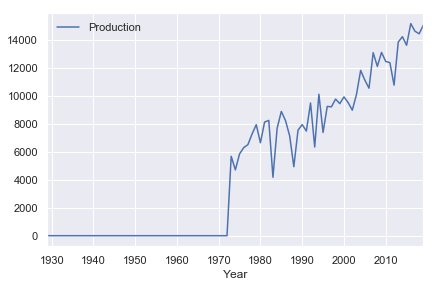

In [986]:
df.plot.line(x='Year', y='Production')

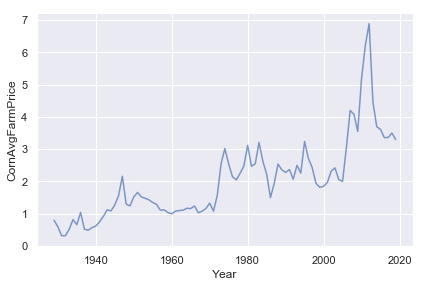

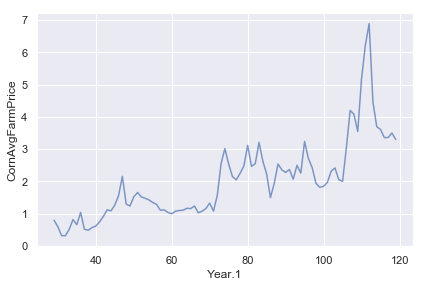

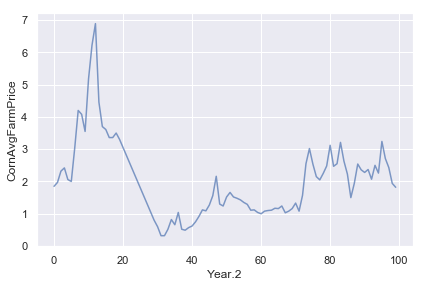

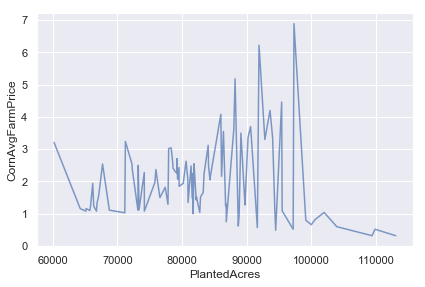

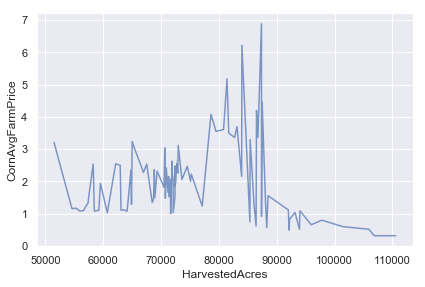

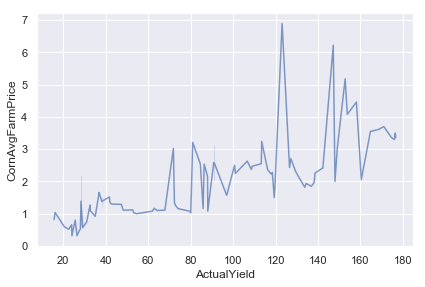

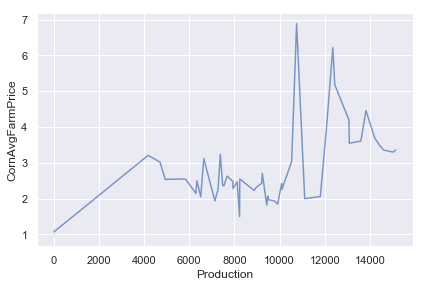

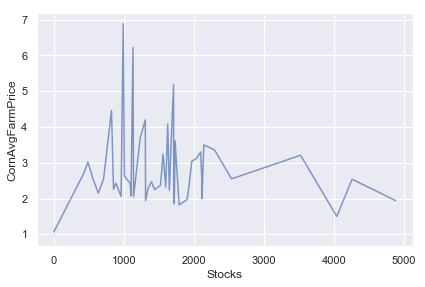

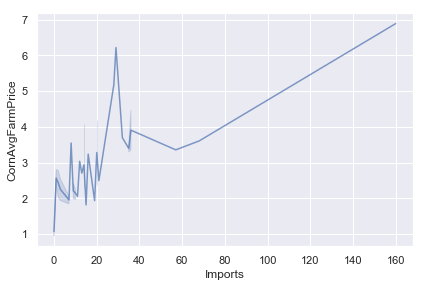

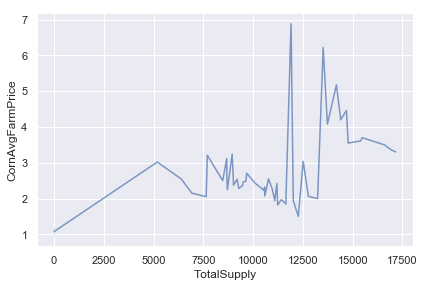

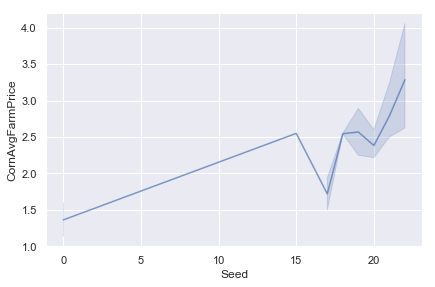

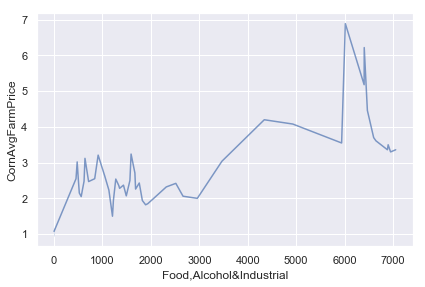

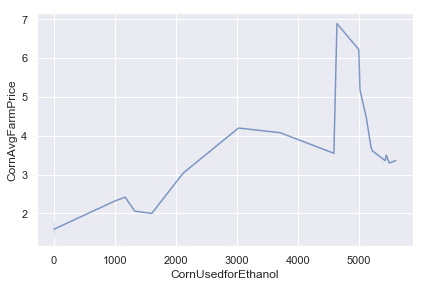

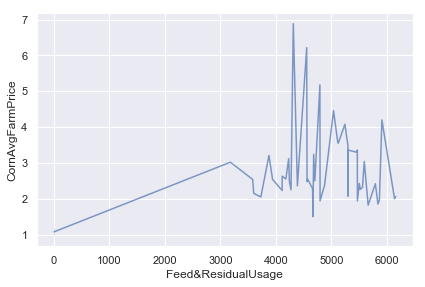

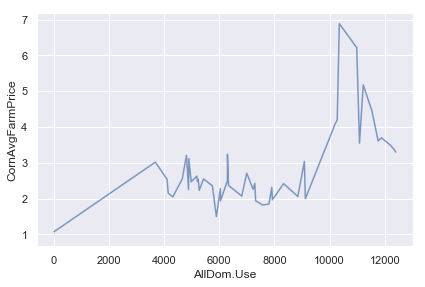

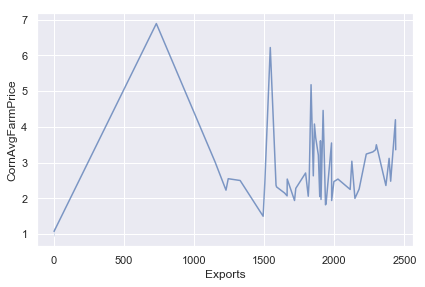

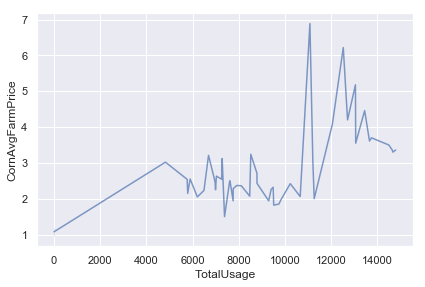

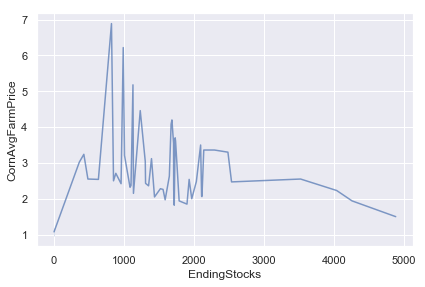

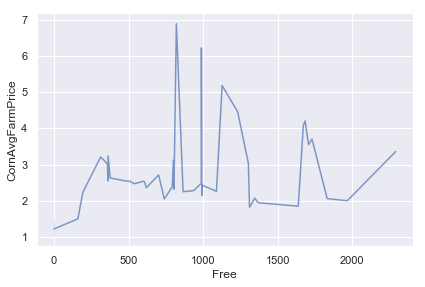

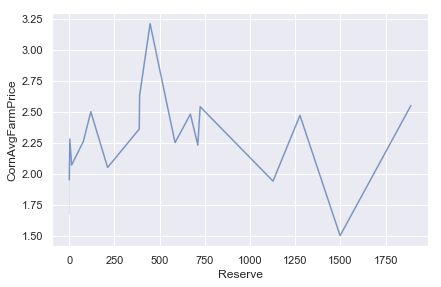

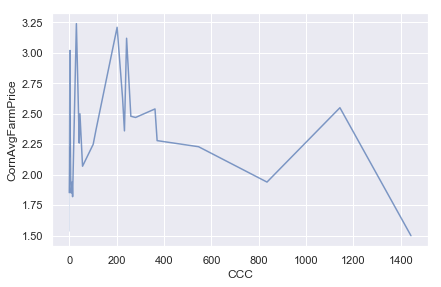

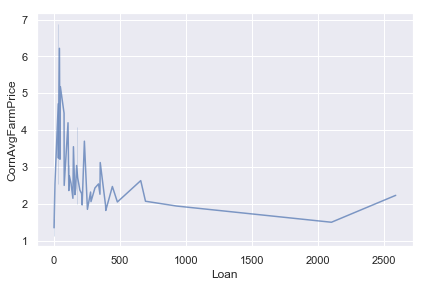

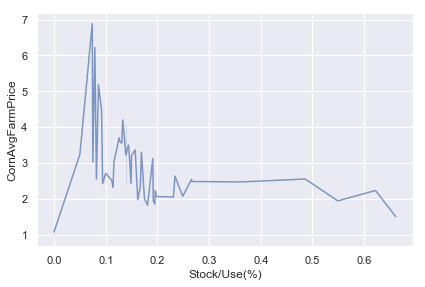

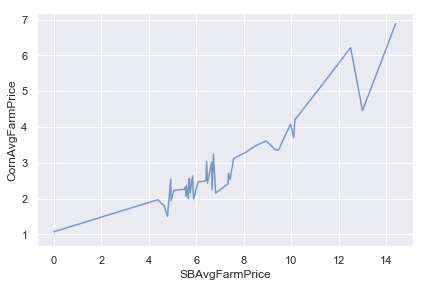

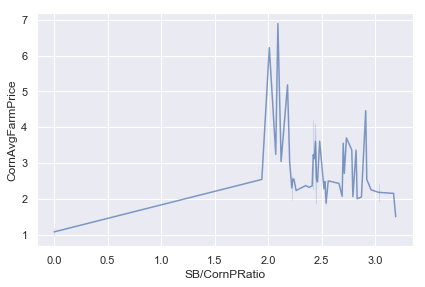

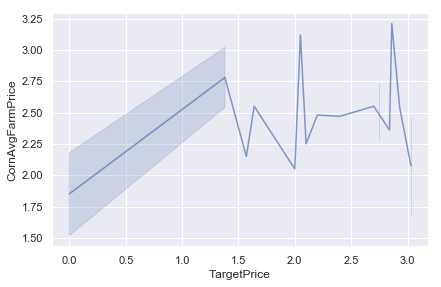

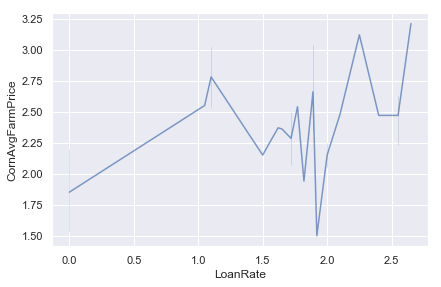

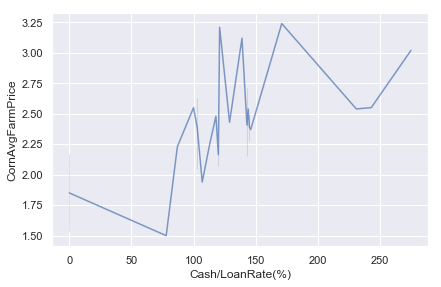

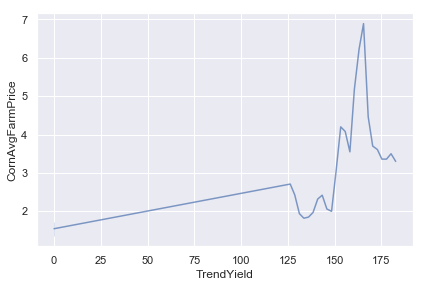

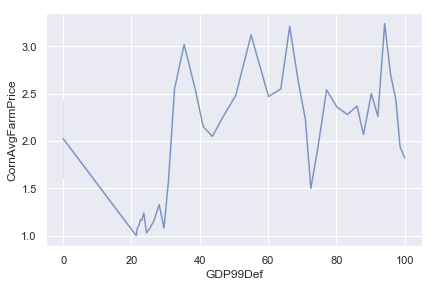

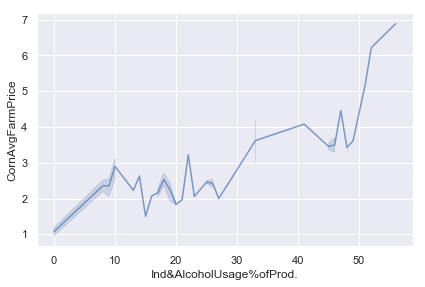

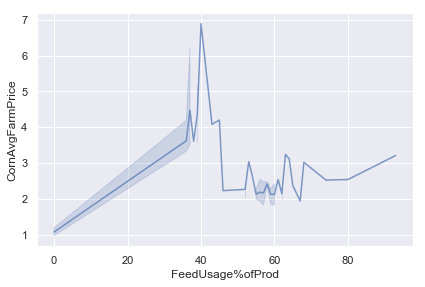

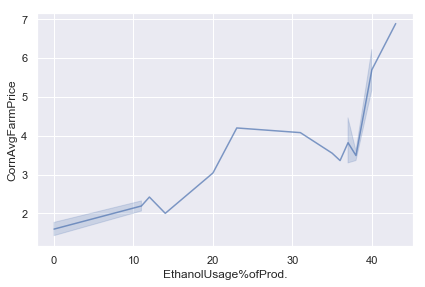

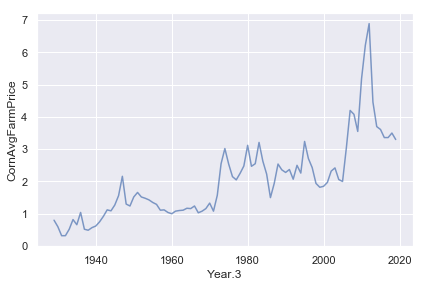

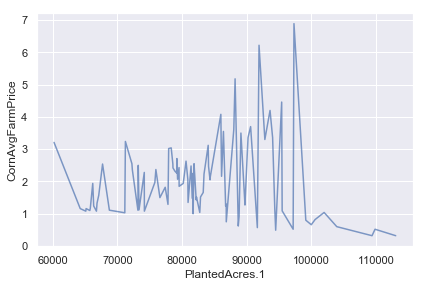

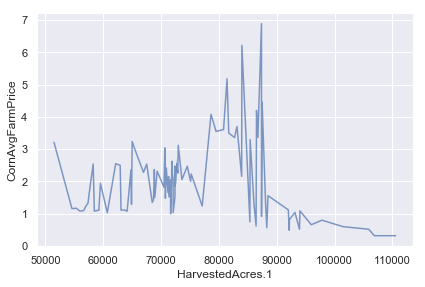

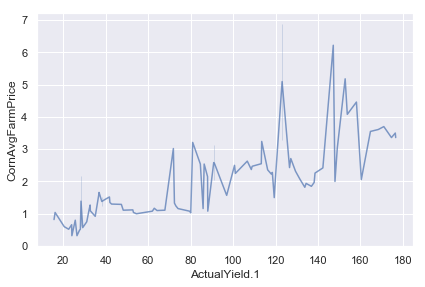

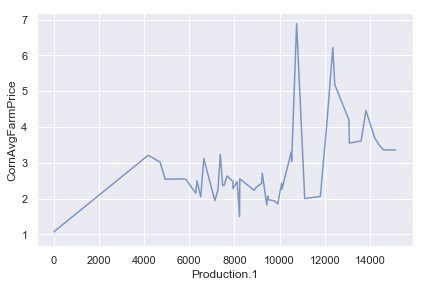

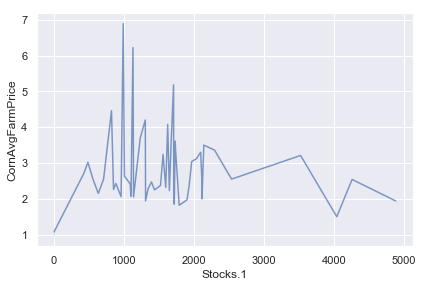

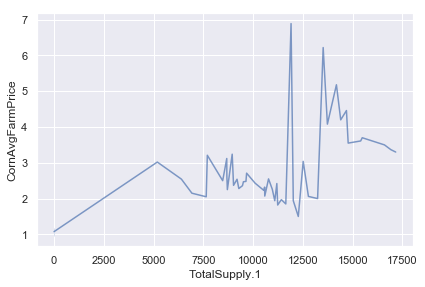

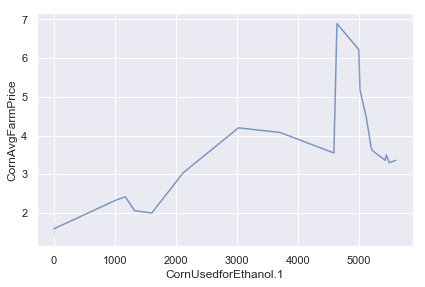

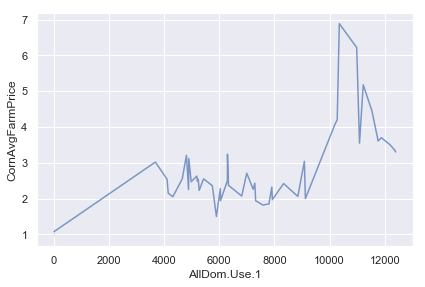

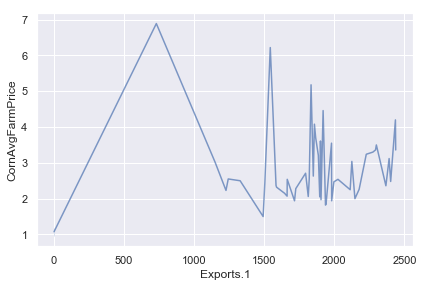

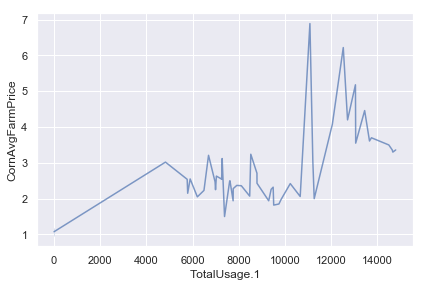

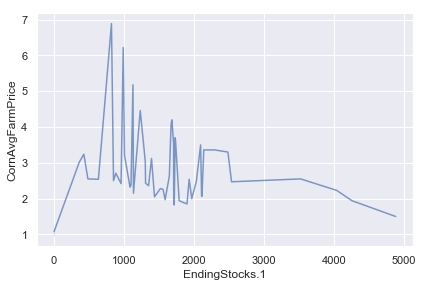

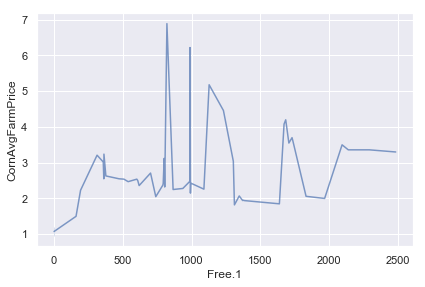

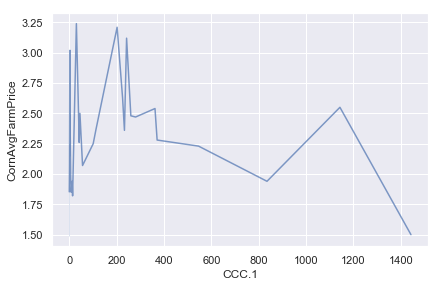

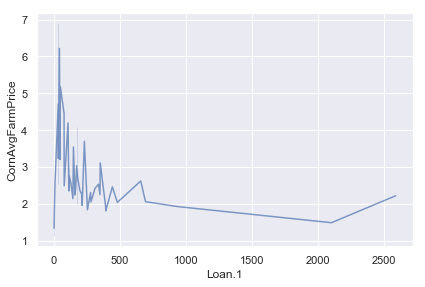

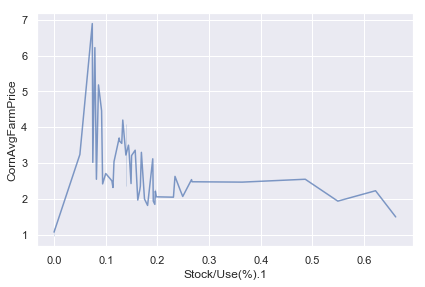

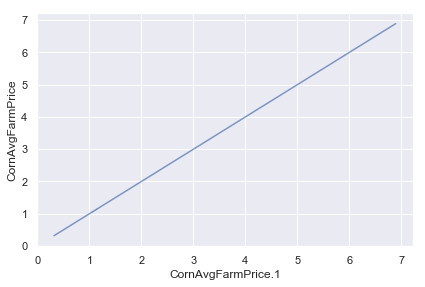

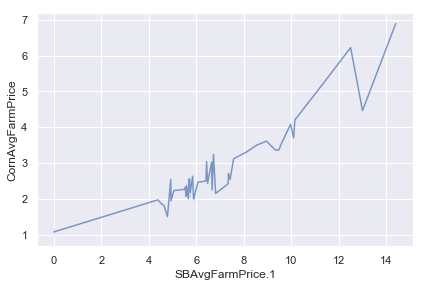

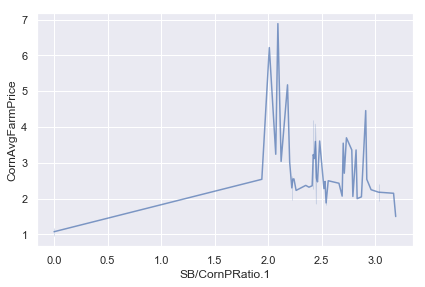

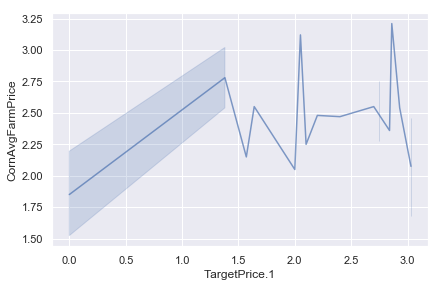

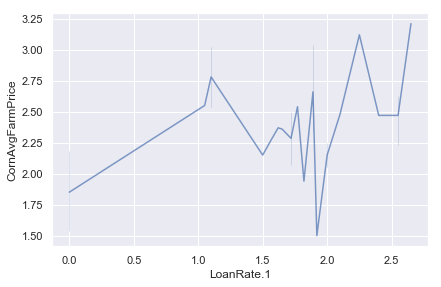

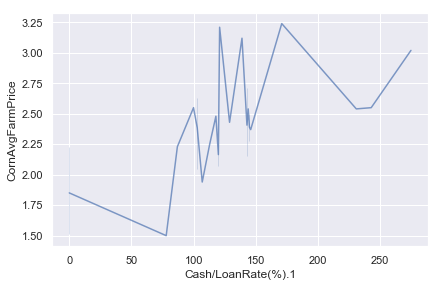

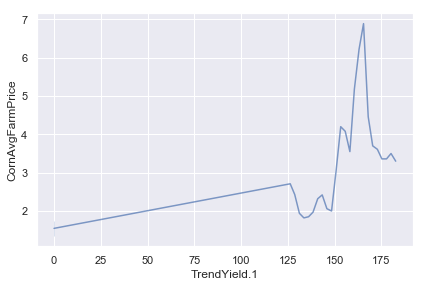

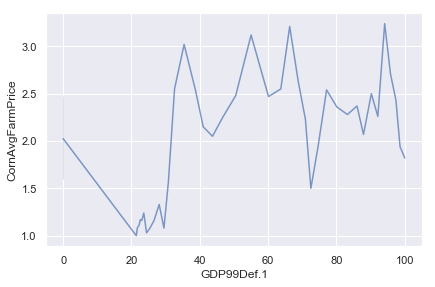

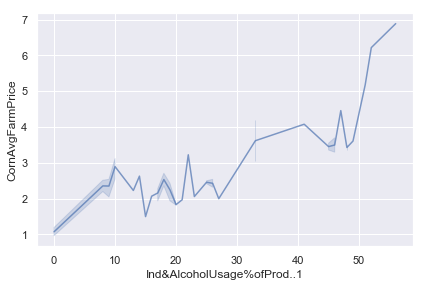

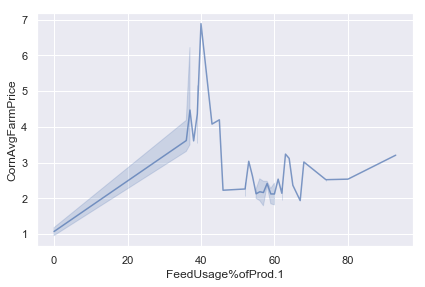

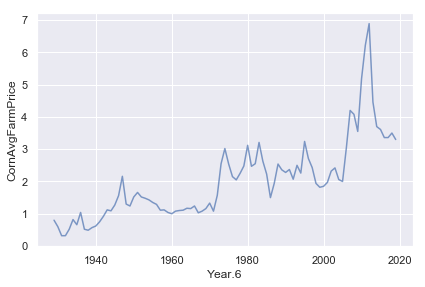

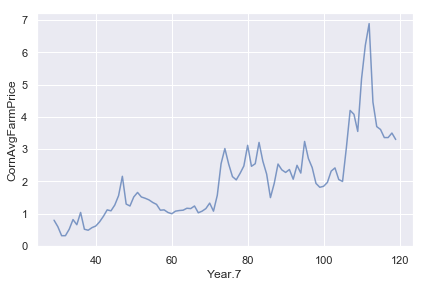

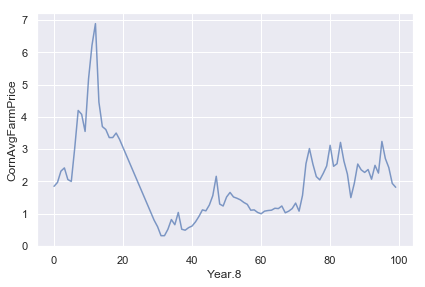

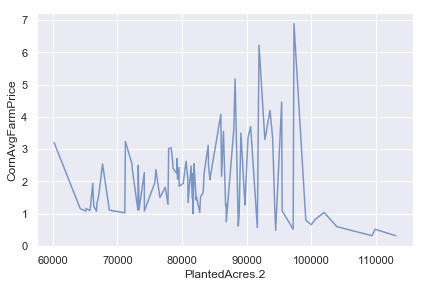

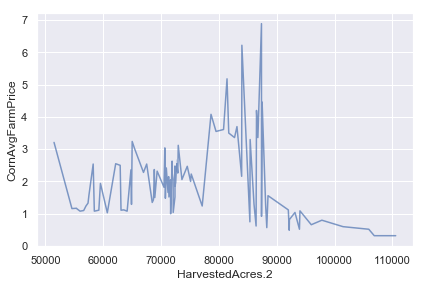

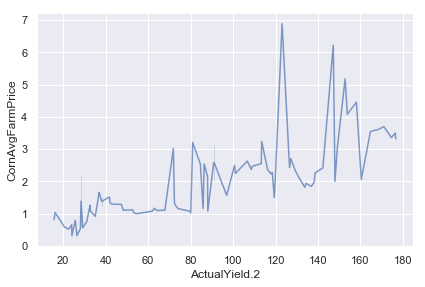

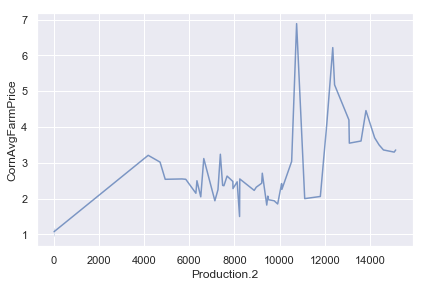

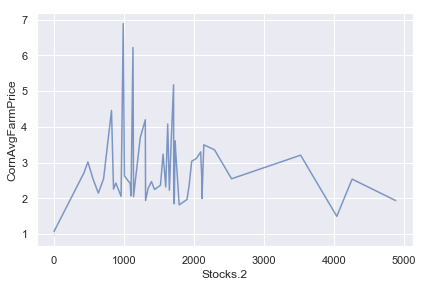

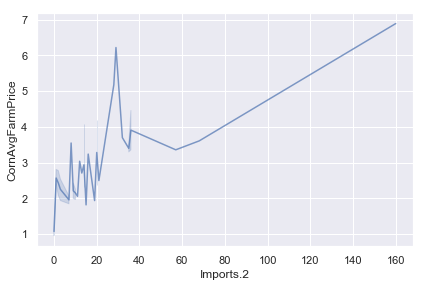

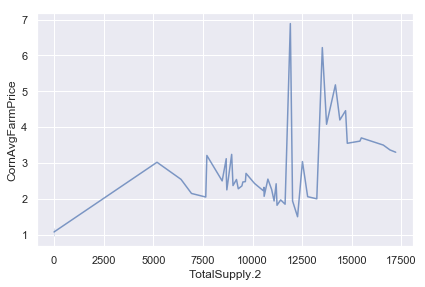

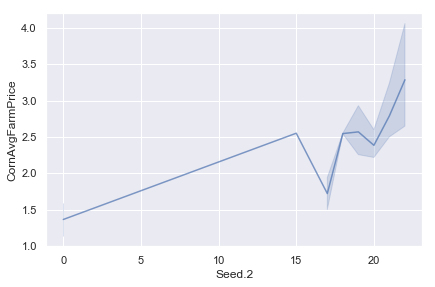

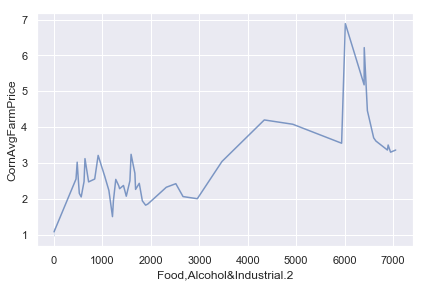

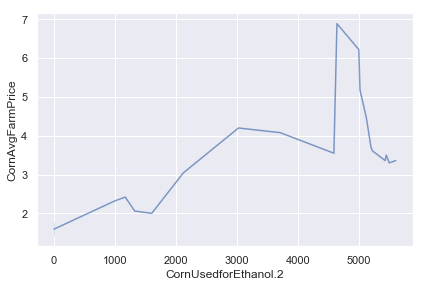

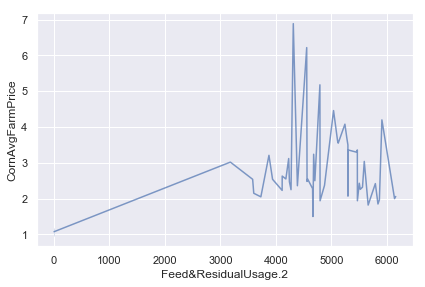

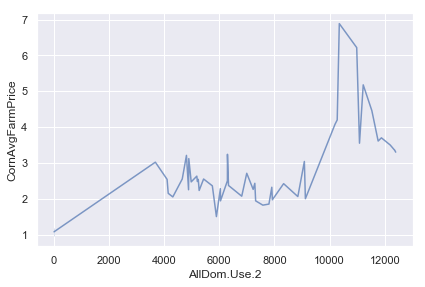

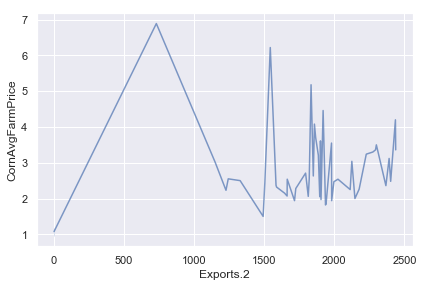

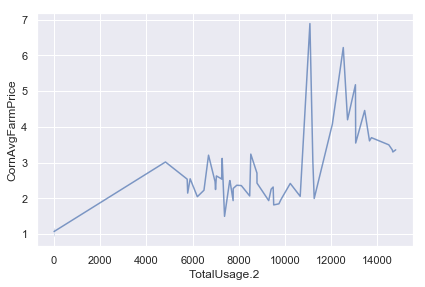

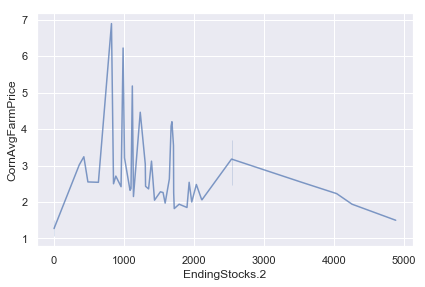

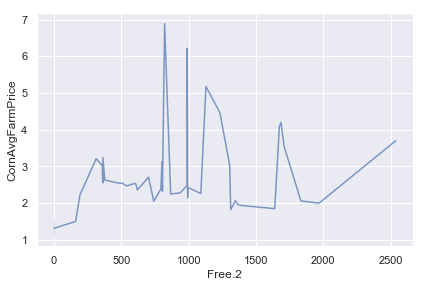

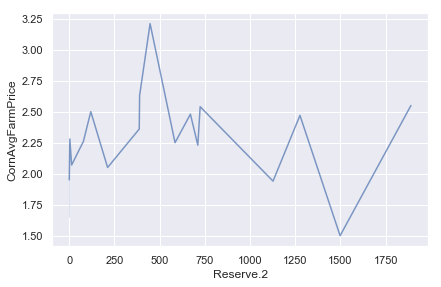

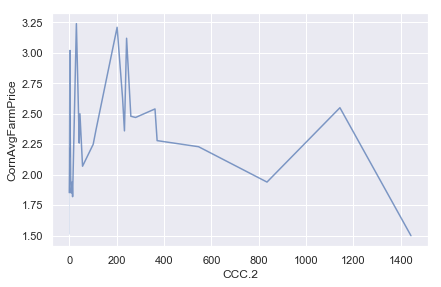

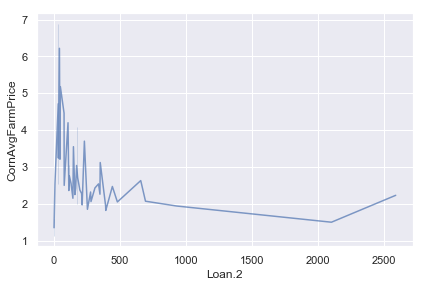

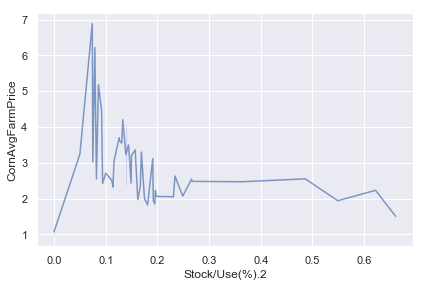

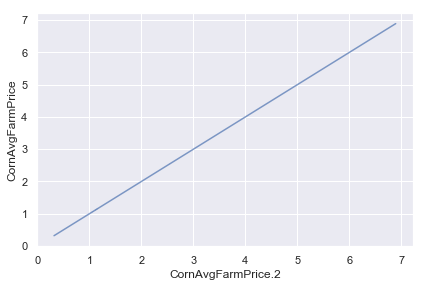

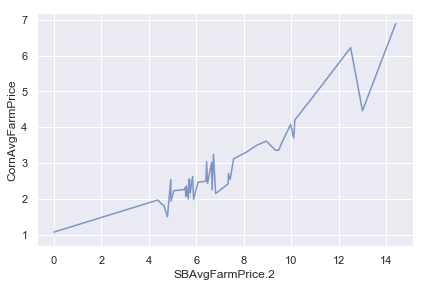

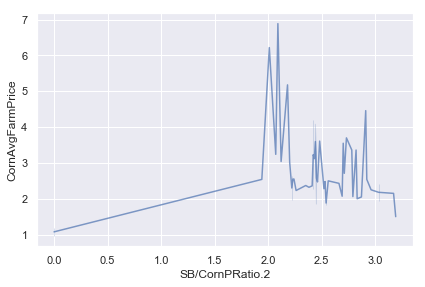

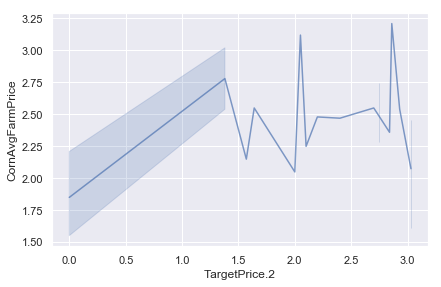

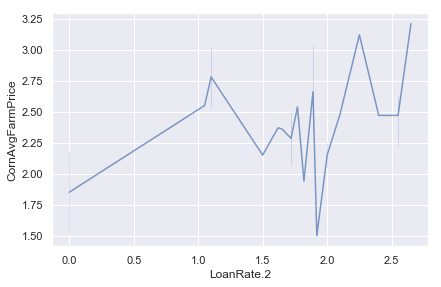

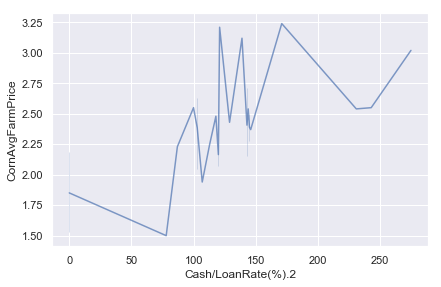

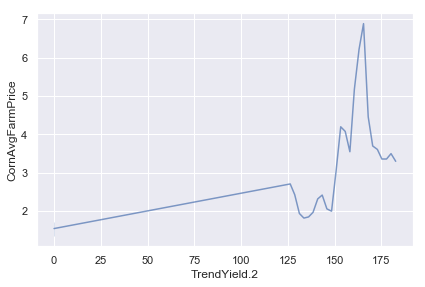

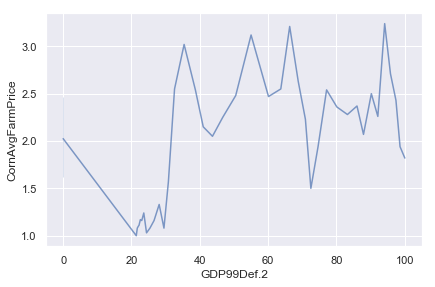

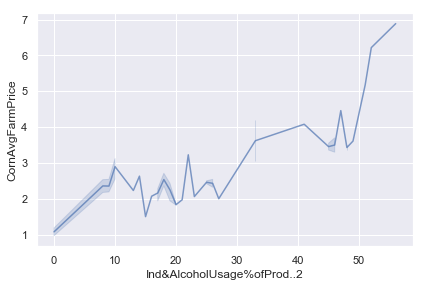

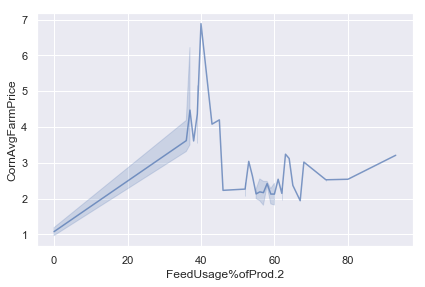

In [987]:
# df.boxplot(column='ActualYield',by='TotalUsage')

target = 'CornAvgFarmPrice'
numeric_columns = df.select_dtypes(include='number').columns
for feature in numeric_columns.drop(target):
    sns.lineplot(x=feature, y=target, data=df, alpha=0.7)
    plt.show()

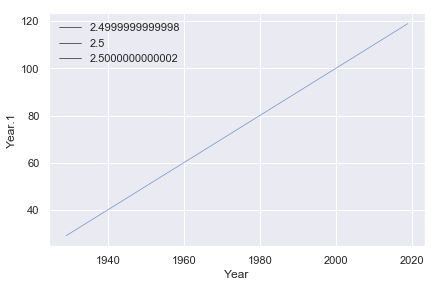

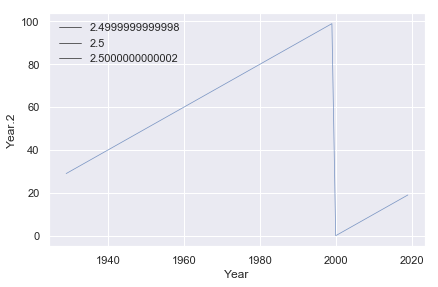

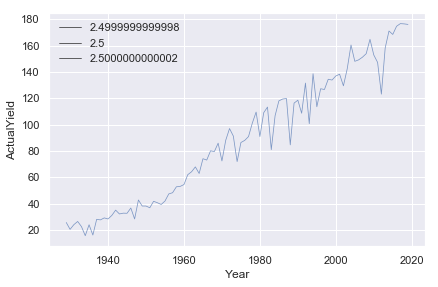

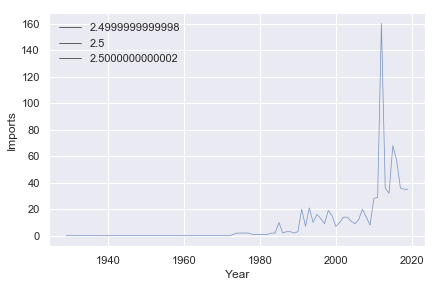

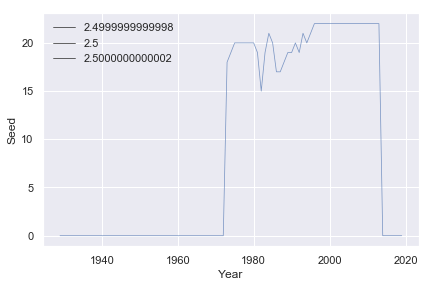

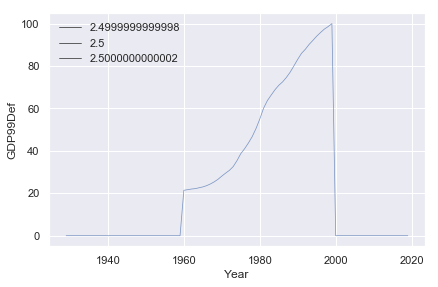

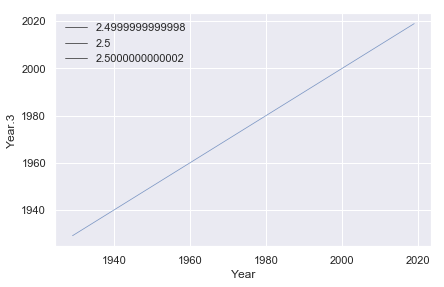

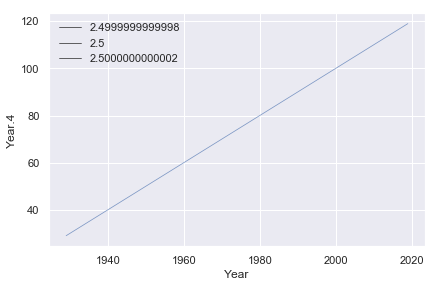

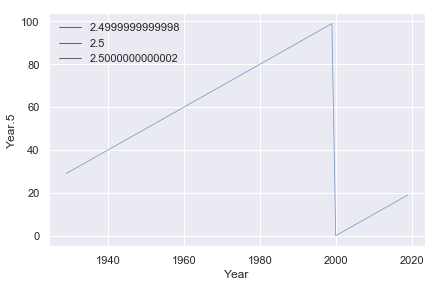

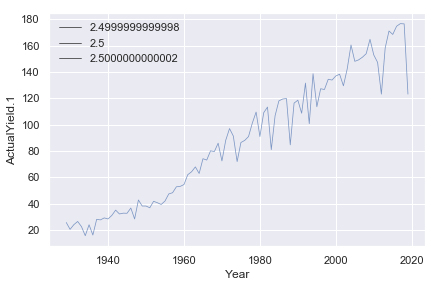

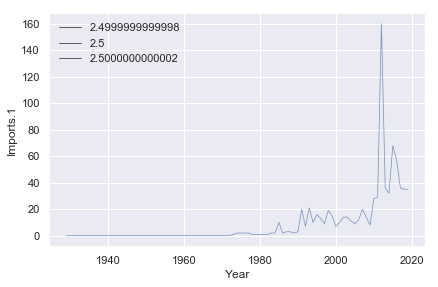

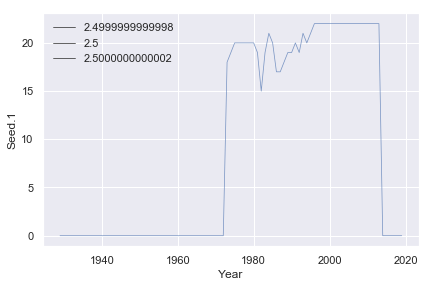

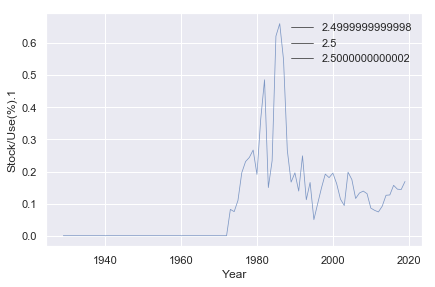

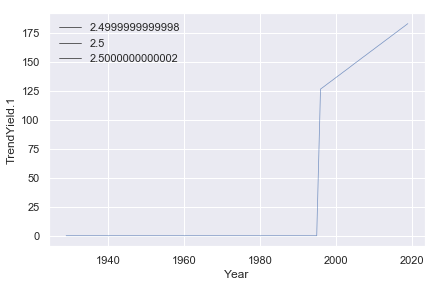

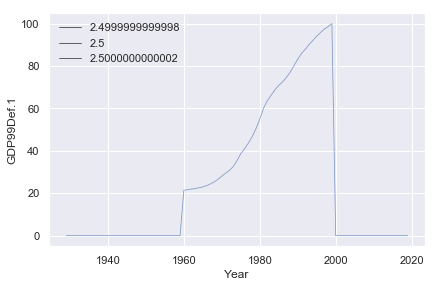

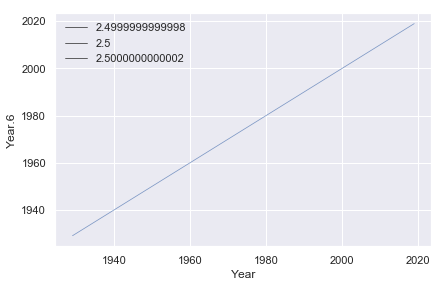

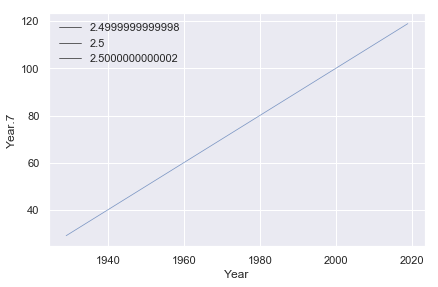

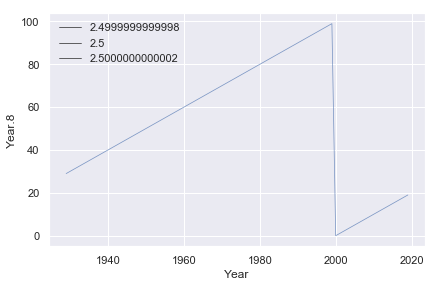

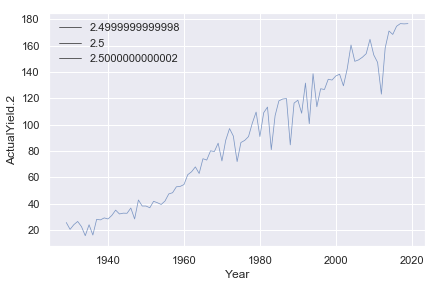

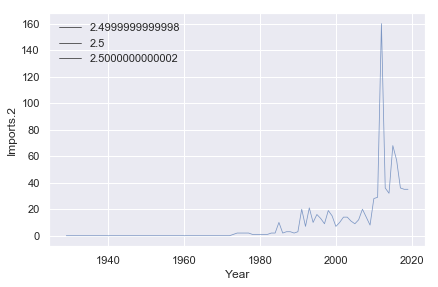

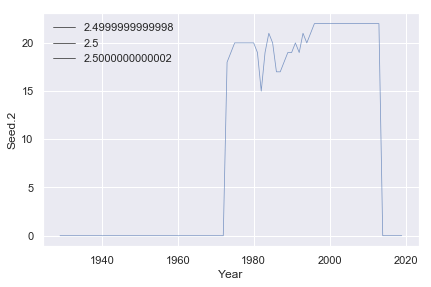

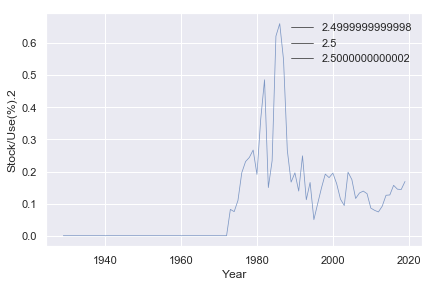

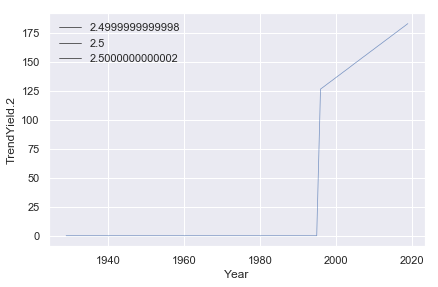

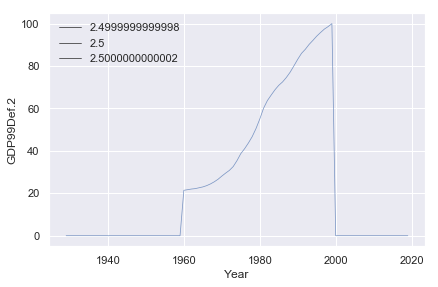

In [965]:
sns.set()
target = 'Year'
numeric_columns = df.select_dtypes(include='number').columns
for feature in numeric_columns.drop(target):
    sns.lineplot(x=target, y=feature, data=df, alpha=0.7, size=2.5)
    plt.show()

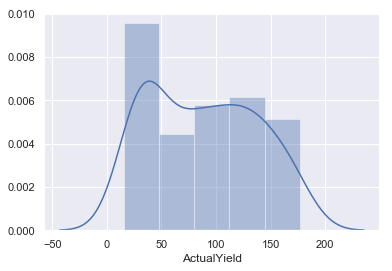

In [721]:
sns.distplot(df['ActualYield']);

In [745]:
toplot = df.iloc[:, : 34]#of 34
toplot = toplot.drop(['ActualYield'], axis=1)
a = sns.set(font_scale=1.4)
a = sns.pairplot(toplot, kind='reg')
# a.axes.set_xlabel(fontsize=10)
plt.show();

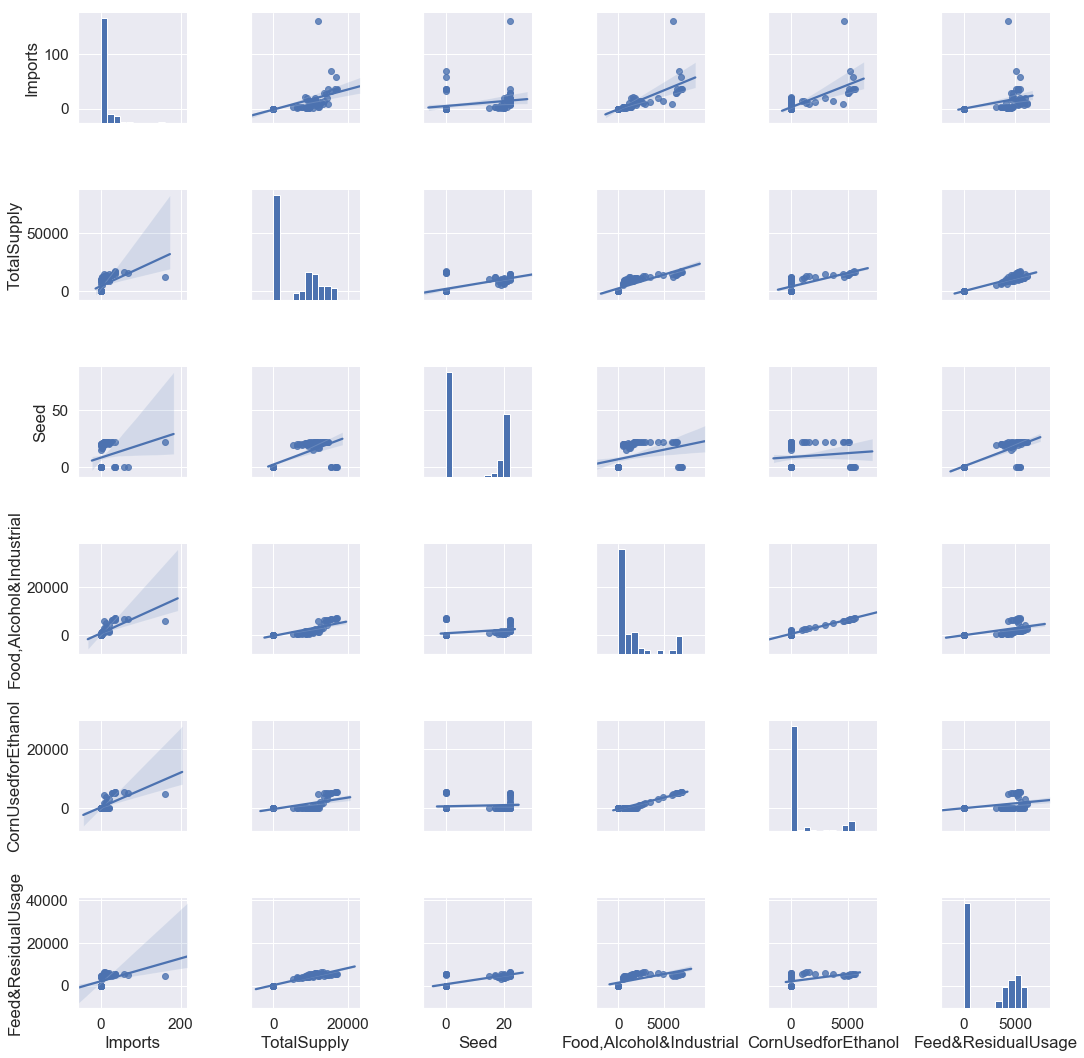

In [744]:
toplot = df.iloc[:, : 7]#of 34
# toplot = toplot.drop(['ActualYield'], axis=1)
a = sns.set(font_scale=1.4)
a = sns.pairplot(toplot, kind='reg')
# a.axes.set_xlabel(fontsize=10)
plt.show();

In [714]:
#correlation matrix
corrmat = df.iloc[:, : 34].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [997]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
import numpy as np

y = df.iloc[:,:14]
x = df['Year']
y = y.drop(columns = ['Year'])
fig = plt.figure()
ax = fig.add_subplot(111)
# replace the next line 
#jet = colors.Colormap('jet')
# with
jet = cm = plt.get_cmap('Set3') 
ax.plot(x,y)
ax.set_xlim((10000))
ax.set_xlim((1970,2019))
#added this to get the legend to work

handles,labels = ax.get_legend_handles_labels()
leg = ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
for text in leg.get_texts():
    plt.setp(text, color = 'k')
    
ax.patch.set_facecolor('#FFFFFF')
ax.grid(color='white', linestyle='-', linewidth=0.3)

    
# ax.grid()
plt.show()

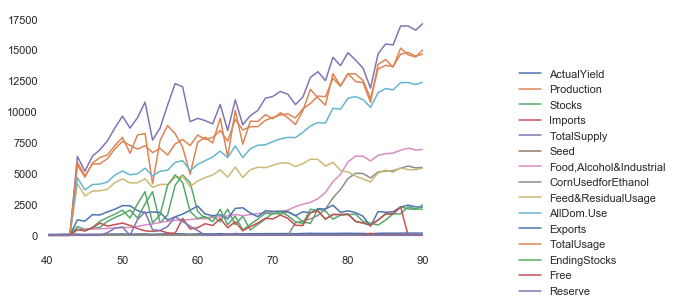

In [1042]:
toplot = df.iloc[2:, 5: 20]#of 34
# toplot = toplot.drop(['Year'], axis=1)

# Using the five thirty eight style
plt.style.context('seaborn-muted')

fig, ax = plt.subplots()

# Post test addition: Specified the line colors 
# cmap = ['#335EFF','#F34B1F','#791AC8']
toplot.plot.line(ax=ax)

# # Title and subtitle
# ax.text(s="Who Got To Be On 'The Daily Show'?", y=114, x=1997.5, >>>>>>>>fontsize=18, fontweight='semibold')
# ax.text(s="Occupation of guests, by year", y=107, x=1997.5, >>>>>>>>fontsize=16)

ax.set_xlim((40,90))
# ax.set_xlabel('')

# Changed the background color to white to make the lines pop
ax.set(facecolor='#FFFFFF')
# plt.xticks(range(1960, 2019, 4))

# Setting the color of the sides and adjusting the grid
# For a more modern look 
fig.patch.set_facecolor('#FFFFFF')
plt.grid(color='white', linestyle='-', linewidth=0.3)

# # Set the labels in plot
# ax.get_legend().remove();
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
# ax.text(x=2000.5,y=80, s="Acting, Comedy & Music", fontsize=13, >>>>>>>>fontweight='bold', color=('#335EFF'));
# ax.text(x=2009,y=5, s="Government and Politics", fontsize=13, >>>>>>>>fontweight='bold', color=('#F34B1F'));
# ax.text(x=2007.5,y=50, s="Media", fontsize=13, fontweight='bold', >>>>>>>>color=('#791AC8'));

In [1041]:
# NCURVES = 10
# np.random.seed(101)
# curves = [np.random.random(20) for i in range(NCURVES)]
# values = range(NCURVES)

# fig = plt.figure()
# ax = fig.add_subplot(111)
# # replace the next line 
# jet = colors.Colormap('jet')
# # with
# jet = cm = plt.get_cmap('Set3') 
# cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
# scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)


# lines = []
# for idx in range(len(curves)):
#     line = curves[idx]
#     colorVal = scalarMap.to_rgba(values[idx])
#     colorText = (
#         'color: (%4.2f,%4.2f,%4.2f)'%(colorVal[0],colorVal[1],colorVal[2])
#         )
#     retLine, = ax.plot(line,
#                        color=colorVal,
#                        label=colorText)
#     lines.append(retLine)
# #added this to get the legend to work
# handles,labels = ax.get_legend_handles_labels()
# ax.legend(handles, labels, loc='upper right')
# ax.grid()
# plt.show()

In [1077]:
# def sinplot(flip=1):
#     x = df['Year']
#     y = df.iloc[:, 5: 20]
#     fig, ax = plt.subplots()
#     for i in x:
#         plt.plot(x, y)
#         plt.xlim((1974,2019))
# #         handles,labels = ax.get_legend_handles_labels()
#         plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(1.45, 0.8))
#     fig.patch.set_facecolor('#FFFFFF');
#     plt.grid(color='white', linestyle='-', linewidth=0.3)
        
# sinplot()
# a.set_xlim((1970,2019))

In [1241]:
x = df['Year']
y = df['HarvestedAcres']
y2 = df['PlantedAcres']
y3 = df['CornAvgFarmPrice']*20000

f, ax = plt.subplots(1, 1)

ax.text(s="U.S. Corn Harvested and Planted vs. Average Corn Farm Price", y=24000, x=1990, fontsize=18, fontweight='semibold', color="#660000")
ax.text(s="U.S. Department of Agriculture 1929 - 2019, Data Obtained May 10, 2019", y=10007, x=1990.8, fontsize=16, color="#800000")#800000



ax.plot(x, y, color="#b25959", label="Harvested Acres", linestyle="-")
ax.plot(x, y2, color="#dd9d72", label="Planted Acres", linestyle="-", alpha=.9)
ax.plot(x, y3, color="magenta", label="Corn Average Farm Price", linestyle="-", alpha=.45)
plt.grid(color='lightgrey', linestyle='-', linewidth=0.2)
# ax.legend( loc='upper center', bbox_to_anchor=(1.05, 0.8))
ax.set(facecolor='#FFFFFF')
f.set_size_inches(12,6, forward=True)

ax.text(x=2020.5,y=84000, s="Harvested Acres", fontsize=15,fontweight='bold', color=('#b25959'));
ax.text(x=2015,y=98500, s="Planted Acres", fontsize=15,fontweight='bold', color=('#dd9d72'), alpha=1);
ax.text(x=2013.5,y=117300, s="Normalized Average Corn Farm Price", fontsize=15, fontweight='bold',color=('magenta'), alpha=.4);

ax.set_ylabel('Number of Acres', fontsize=16)
ax.set_xlabel('Year', fontsize=16)
ax.yaxis.set_label_coords(-.1, 0.5)
ax.xaxis.set_label_coords(0.5, -0.1)

plt.show()